In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


Rt2_Nils = '../other_programs/COVID19-R/Rvalues_from_smoothed_casedata/Rvalues_smoothed_std_2.csv'


In [2]:
# set cutoff 10 days later to include effects of shiftdays
crossval_2020_03_19 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate = '29/3/2020', verbose = True)
crossval_2020_03_31 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate =  '9/4/2020', verbose = True)
crossval_2020_04_06 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate = '16/5/2020', verbose = True)

In [3]:
shiftdaylist  = np.concatenate([np.arange(10)*2,[11,13]])
alphalist     = np.power(10,np.linspace(-4,-1,num=7))
crossvalcount = 10

crossval_2020_03_19.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_2020_03_31.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_2020_04_06.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)


  0 0.000100        21:42:01
  0 0.000316        21:42:20
  0 0.001000        21:42:36
  0 0.003162        21:42:50
  0 0.010000        21:43:00
  0 0.031623        21:43:07
  0 0.100000        21:43:14
  2 0.000100        21:43:34
  2 0.000316        21:43:53
  2 0.001000        21:44:10
  2 0.003162        21:44:22
  2 0.010000        21:44:32
  2 0.031623        21:44:39
  2 0.100000        21:44:45
  4 0.000100        21:45:07
  4 0.000316        21:45:26
  4 0.001000        21:45:42
  4 0.003162        21:45:56
  4 0.010000        21:46:05
  4 0.031623        21:46:12
  4 0.100000        21:46:19
  6 0.000100        21:46:40
  6 0.000316        21:46:59
  6 0.001000        21:47:16
  6 0.003162        21:47:29
  6 0.010000        21:47:38
  6 0.031623        21:47:46
  6 0.100000        21:47:53
  8 0.000100        21:48:14
  8 0.000316        21:48:33
  8 0.001000        21:48:50
  8 0.003162        21:49:05
  8 0.010000        21:49:15
  8 0.031623        21:49:22
  8 0.100000  

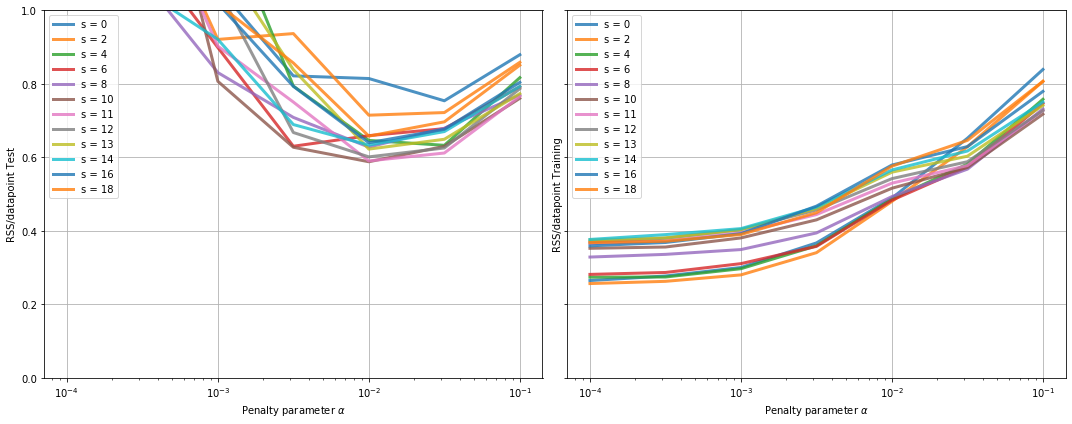

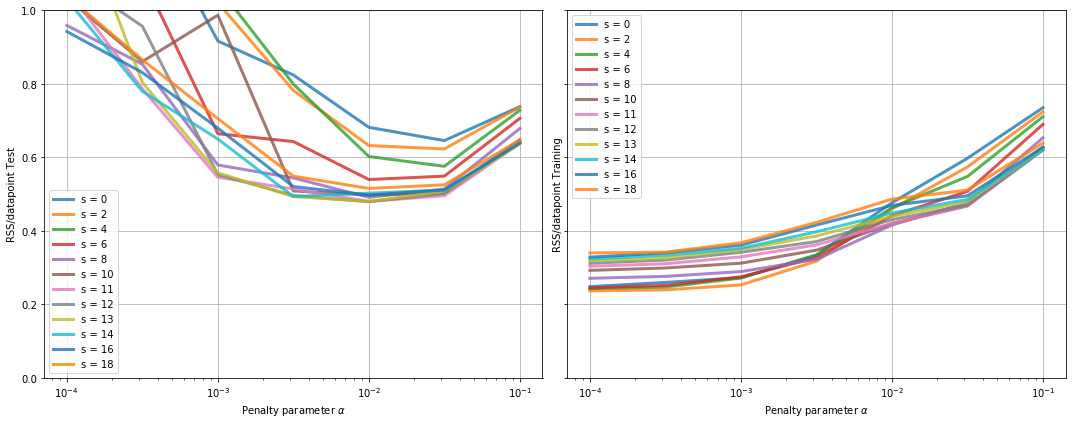

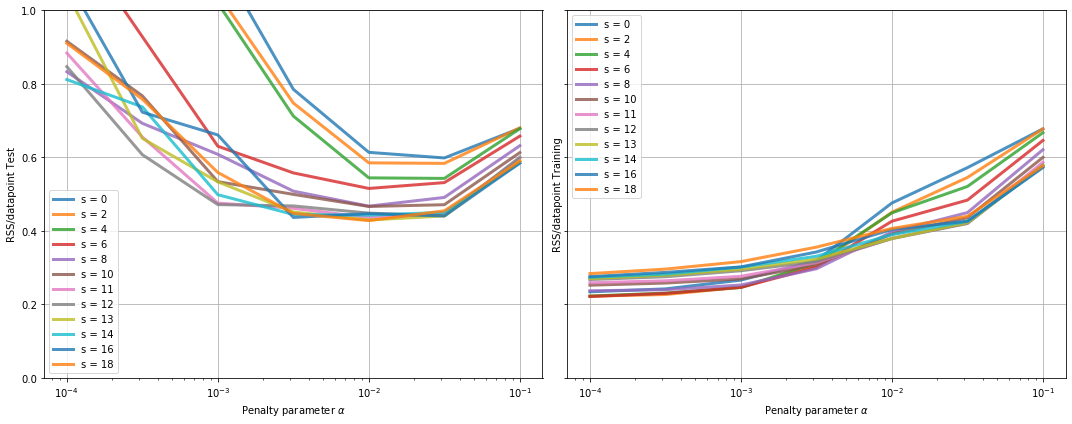

In [4]:
crossval_2020_03_19.PlotCVresults(filename = 'cv_Rt_2020-03-19.pdf')
crossval_2020_03_31.PlotCVresults(filename = 'cv_Rt_2020-03-31.pdf')
crossval_2020_04_06.PlotCVresults(filename = 'cv_Rt_2020-04-06.pdf')

In [5]:
print(crossval_2020_03_19.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())
print(crossval_2020_03_31.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())
print(crossval_2020_04_06.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())


    shiftdays     alpha  RSS Test Sum  Test Sample Size
36         10  0.010000    550.627834               936
43         11  0.010000    552.745376               936
50         12  0.010000    563.048782               936
46         11  0.031623    572.861114               936
57         13  0.010000    582.793166               936
    shiftdays     alpha  RSS Test Sum  Test Sample Size
50         12  0.010000    699.581294              1459
57         13  0.010000    700.886457              1459
43         11  0.010000    701.107770              1459
29          8  0.010000    717.232960              1459
61         13  0.003162    720.104877              1459
    shiftdays     alpha  RSS Test Sum  Test Sample Size
78         18  0.010000    834.463937              1949
57         13  0.010000    837.725379              1949
43         11  0.010000    849.831351              1949
75         16  0.003162    851.351357              1949
74         16  0.031623    859.028818           

In [6]:
crossval_2020_03_19.ComputeFinalModels(modelparameters=[(11,10**-2.00)])
crossval_2020_03_31.ComputeFinalModels(modelparameters=[(12,10**-2.00)])
crossval_2020_04_06.ComputeFinalModels(modelparameters=[(13,10**-2.00)])


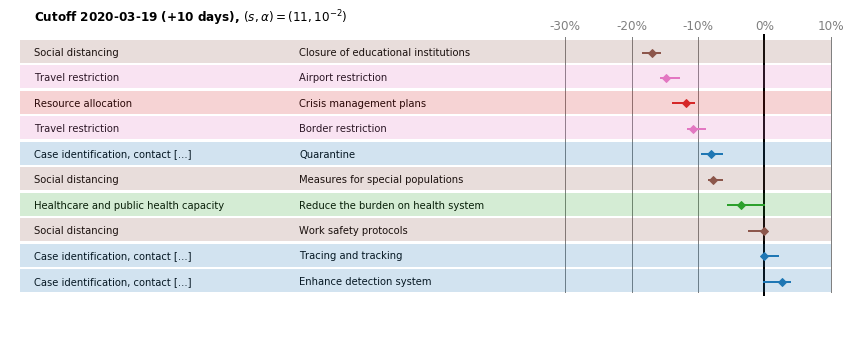

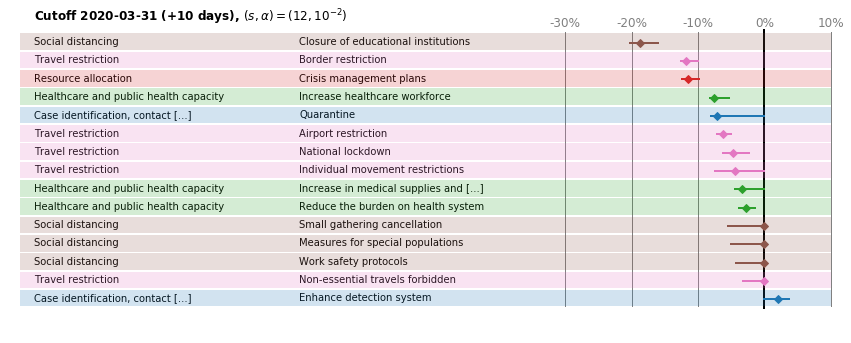

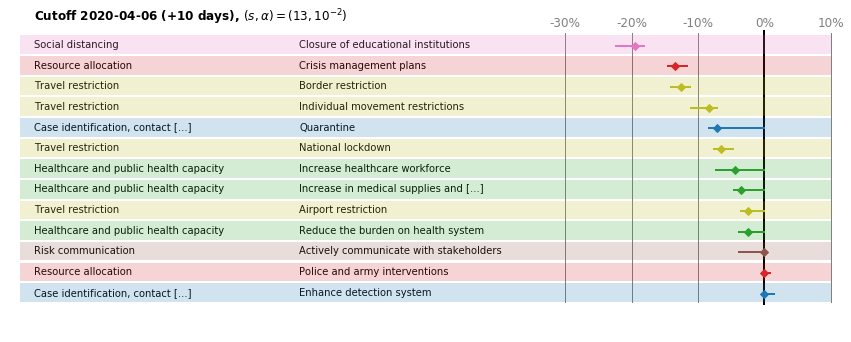

In [11]:
crossval_2020_03_19.PlotMeasureListSorted(drop_zeros=True,figsize = (15,6),title = 'Cutoff 2020-03-19 (+10 days), $(s,\\alpha)=(11,10^{-2})$',filename = 'measures_cutoff20200319.pdf')
crossval_2020_03_31.PlotMeasureListSorted(drop_zeros=True,figsize = (15,6),title = 'Cutoff 2020-03-31 (+10 days), $(s,\\alpha)=(12,10^{-2})$',filename = 'measures_cutoff20200331.pdf')
crossval_2020_04_06.PlotMeasureListSorted(drop_zeros=True,figsize = (15,6),title = 'Cutoff 2020-04-06 (+10 days), $(s,\\alpha)=(13,10^{-2})$',filename = 'measures_cutoff20200406.pdf')

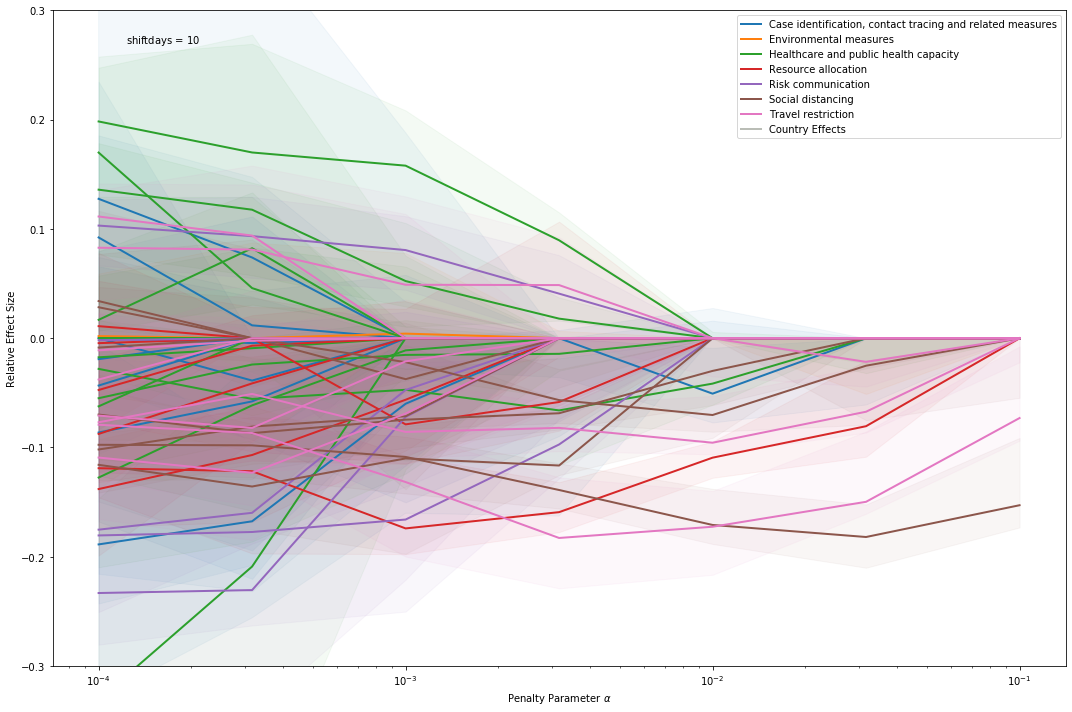

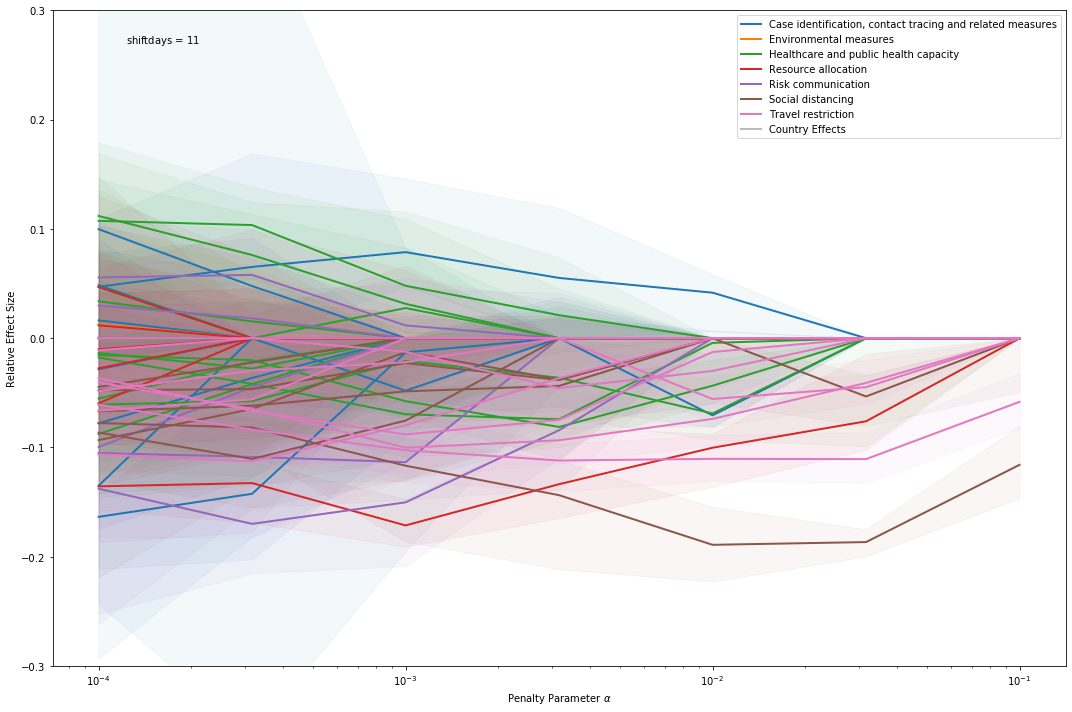

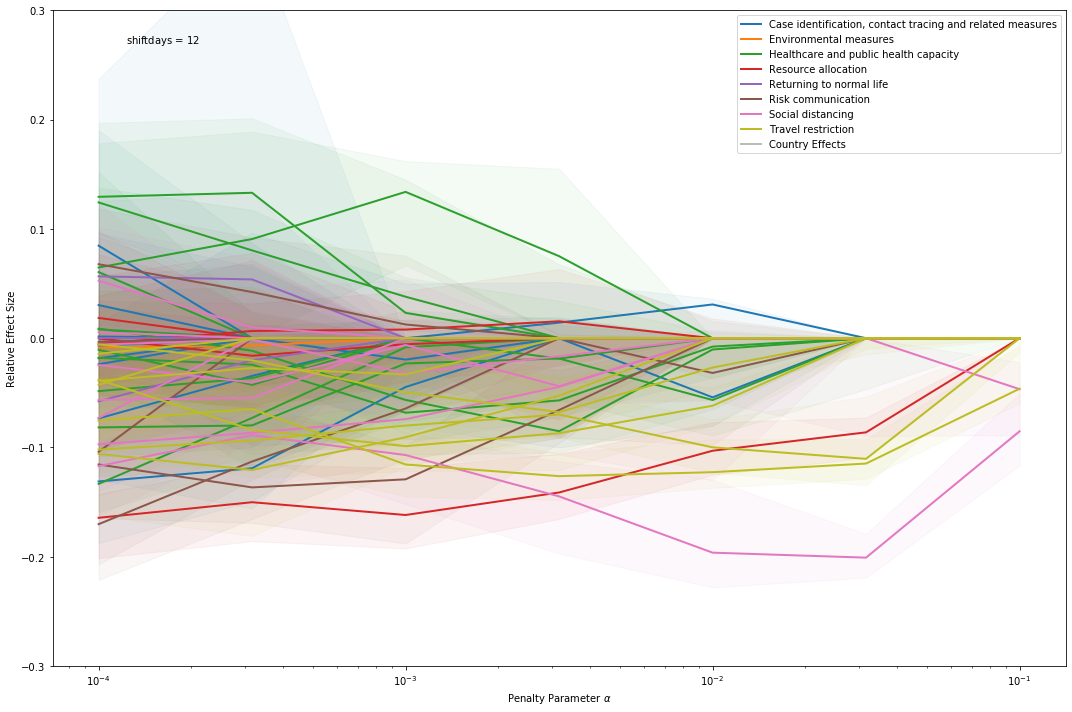

In [12]:
crossval_2020_03_19.PlotCVAlphaSweep(shiftdays=[10],ylim=(-.3,.3),filename = 'CV_Rt2_alphasweep_20200319.pdf')
crossval_2020_03_31.PlotCVAlphaSweep(shiftdays=[11],ylim=(-.3,.3),filename = 'CV_Rt2_alphasweep_20200331.pdf')
crossval_2020_04_06.PlotCVAlphaSweep(shiftdays=[12],ylim=(-.3,.3),filename = 'CV_Rt2_alphasweep_20200406.pdf')

In [ ]:
crossval_2020_03_19.GetMeasureEffects(drop_zeros = True, rescale = False).to_csv('lasso_measureeffects_Rt2_cutoff20200319.csv')
crossval_2020_03_31.GetMeasureEffects(drop_zeros = True, rescale = False).to_csv('lasso_measureeffects_Rt2_cutoff20200331.csv')
crossval_2020_04_06.GetMeasureEffects(drop_zeros = True, rescale = False).to_csv('lasso_measureeffects_Rt2_cutoff20200406.csv')

print(crossval_2020_03_31.GetMeasureEffects(drop_zeros = True, rescale = False)[['Measure_L1','Measure_L2','median']].set_index('Measure_L1',drop=True).to_latex())